# Importing Libraries

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# Loading the Dataset


### we've loaded data set "retention.json" , converted it to a .csv file and saved it on local machine

In [3]:
# Reading JSON Data using Pandas
raw_data = pd.read_json("retention.json",orient='index')

#saving the data into a csv file
raw_data.to_csv("retention.csv",index=False)
original_data = pd.read_csv("retention.csv")

#copying the data into another DataFrame
data = original_data.copy()
data.head(5)

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


# Data Wrangling


## Data formatting

### Renaming 

#### now let's rename the colum names for our understanding

In [4]:
data.rename(columns={"num_credit_cards":"credit cards","tiprel_1mes":"inactivity flag(begin)","ind_actividad_cliente":"inactivity flag(end)","num_Products":"products","num_loans":"loans"},inplace=True)
data.head(5)

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


## Missing values in data


In [5]:
data.isnull().sum()

gender                    0
age                       0
gross_income              0
segment                   0
credit cards              0
inactivity flag(begin)    0
inactivity flag(end)      0
products                  0
loans                     0
duration                  0
dtype: int64

### There are no missing values in any of the columns.
### Few columns came in different data type. age and gross income are in object type.
### After examining dataframe we notice that there were 
### 2 Unique values in gender - Males(M) and Female(F)
### 3 Unique values in segment - Individuals, College Graduate, VIP

# Cleaning Data
### Age and gross income are in object data type, so we need to convert it to integer for further analysis

In [6]:
for i in data.columns:
    print("=====================================")
    print(str(i), end= "\t")
    print(data[i].unique(),end=" ")
    print("count = "+str(len(data[i].unique())))

gender	['M' 'F'] count = 2
age	['21 years' '23 years' '24 years' '31 years' '32 years' '43 years'
 '48 years' '36 years' '26 years' '46 years' '42 years' '22 years'
 '33 years' '40 years' '60 years' '25 years' '45 years' '34 years'
 '30 years' '54 years' '20 years' '39 years' '52 years' '66 years'
 '89 years' '61 years' '71 years' '69 years' '53 years' '18 years'
 '44 years' '70 years' '72 years' '27 years' '64 years' '28 years'
 '73 years' '57 years' '38 years' '78 years' '68 years' '56 years'
 '50 years' '87 years' '51 years' '84 years' '67 years' '37 years'
 '35 years' '63 years' '47 years' '49 years' '29 years' '58 years'
 '74 years' '85 years' '86 years' '88 years' '62 years' '83 years'
 '59 years' '55 years' '75 years' '41 years' '80 years' '14 years'
 '65 years' '76 years' '97 years' '15 years' '82 years' '77 years'
 '98 years' '81 years' '90 years' '91 years' '104 years' '11 years'
 '93 years' '2 years' '99 years' '79 years' '6 years' '13 years'
 '19 years' '17 years' '101 year

In [7]:
# Cleaning and Converting data given in object to int 
data["age"].replace(" years","",regex=True,inplace=True) 
data["gross_income"] = data["gross_income"].str.replace("$","")
data[["age","gross_income","credit cards","products","loans","duration","inactivity flag(end)"]] = data[["age","gross_income","credit cards","products","loans","duration","inactivity flag(end)"]].apply(pd.to_numeric)

In [8]:
age_data = data[["age"]]

In [9]:
data.head()

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376


In [10]:
data.describe(include = "all")

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
count,54030,54030.000000,5.403000e+04,54030,54030.000000,54030,54030.000000,54030.000000,54030.000000,54030.000000
unique,2,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN
top,F,NaN,NaN,Individuals,NaN,I,NaN,NaN,NaN,NaN
freq,29681,NaN,NaN,32607,NaN,29026,NaN,NaN,NaN,NaN
mean,NaN,40.772534,1.341967e+05,NaN,0.049880,NaN,0.469073,1.536017,0.009365,2913.936665
std,NaN,17.210781,2.397215e+05,NaN,0.217698,NaN,0.499047,1.578848,0.096320,2027.956268
min,NaN,2.000000,2.336010e+03,NaN,0.000000,NaN,0.000000,0.000000,0.000000,366.000000
25%,NaN,25.000000,6.858107e+04,NaN,0.000000,NaN,0.000000,1.000000,0.000000,1118.000000
50%,NaN,40.000000,1.015663e+05,NaN,0.000000,NaN,0.000000,1.000000,0.000000,2039.500000
75%,NaN,51.000000,1.562538e+05,NaN,0.000000,NaN,1.000000,2.000000,0.000000,4693.000000


### Converting  unique values of  Inactivity flag(begin) "I" and "A" to binary 

In [11]:
# Converting string data of inactivity flag(begin) to int using map function
data["inactivity flag(begin)"] = data["inactivity flag(begin)"].map({"I":0,"A":1})

In [12]:
data.sample(10)

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
3863,F,47,43438.53,Individuals,0,0,0,1,0,6148
11360,F,22,81450.87,Individuals,0,0,0,0,0,691
31221,M,25,225370.62,College_Graduated,0,1,1,1,0,374
8105,F,25,52128.93,College_Graduated,0,0,0,1,0,1508
34588,F,46,222300.48,Individuals,0,0,1,1,0,1763
25227,F,82,199889.64,Individuals,0,1,1,2,0,3231
20419,F,35,92014.89,Individuals,0,1,1,2,0,1749
11729,F,42,166532.61,VIP,0,1,1,4,0,5225
51360,M,53,359907.33,Individuals,1,1,1,3,0,5319
1741,F,21,168563.88,College_Graduated,0,1,1,1,0,781


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  54030 non-null  object 
 1   age                     54030 non-null  int64  
 2   gross_income            54030 non-null  float64
 3   segment                 54030 non-null  object 
 4   credit cards            54030 non-null  int64  
 5   inactivity flag(begin)  54030 non-null  int64  
 6   inactivity flag(end)    54030 non-null  int64  
 7   products                54030 non-null  int64  
 8   loans                   54030 non-null  int64  
 9   duration                54030 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 4.1+ MB


# Outlier Detection

### Box plot is used to detect outliers in gross income

<AxesSubplot:ylabel='gross_income'>

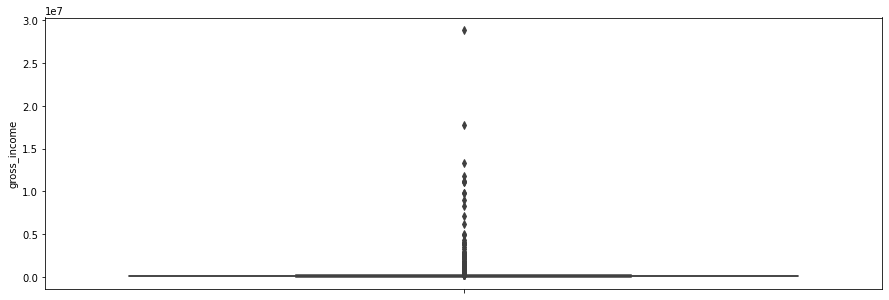

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(y="gross_income",data= data)

## Removing outliers

### In this analysis, we used IQR method to remove outliers. where we use Inter Quartile Range to create upper and lower bounds for data. The points which were below and above this range are treated as outliers and are removed

In [15]:
def outliers_imputation(s):
    Q1 = data[s].quantile(0.25)
    Q3 = data[s].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    outliers = data[(data[s]<(Q1 - 1.5 * IQR)) | (data[s]> (Q3 + 1.5 * IQR))].index
    data.drop(outliers,inplace=True)

outliers_imputation("gross_income")

68581.07250000001 156253.755 87672.6825


## Cleaned Data

<AxesSubplot:ylabel='gross_income'>

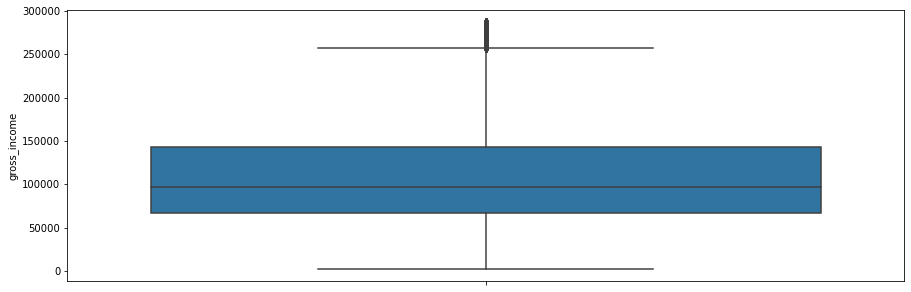

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(y="gross_income",data= data)

### For better understanding of data we splitted the age data into six subgroups. 
### Below 18, 18-25 , 26-35, 36-65, 66-75 and Above 75

In [17]:
#Function to split age into different categories
def age_groups(x):
    if x in range(1,19):
        return "below 18"
    elif x in range(18,26):
        return "18-25"
    elif x in range(26,36):
        return "26-35"
    elif x in range(35,66):
        return "36-65"
    elif x in range(66,76):
        return "66-75"
    else:
        return "Above 75"

data["age"]=data["age"].apply(age_groups)

## After cleaning

In [145]:
for i in data.columns:
    print("=====================================")
    print(str(i), end= "\t")
    print(data[i].unique(),end=" ")
    print("count = "+str(len(data[i].unique())))

gender	['M' 'F'] count = 2
age	['18-25' '26-35' '36-65' '66-75' 'Above 75' 'below 18'] count = 6
gross_income	[ 79070.91 178270.68  31243.56 ... 106930.05  65246.79 180678.48] count = 47054
segment	['Individuals' 'College_Graduated' 'VIP'] count = 3
credit cards	[0 1] count = 2
inactivity flag(begin)	[0 1] count = 2
inactivity flag(end)	[0 1] count = 2
products	[ 1  0  4  2  3  5  6  7  9  8 10 12 11 13] count = 14
loans	[0 1] count = 2
duration	[1035 1097 1866 ... 7440 7382 6981] count = 5601


In [19]:
data.describe(include="all")

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
count,50794,50794,50794.000000,50794,50794.000000,50794.000000,50794.000000,50794.000000,50794.000000,50794.000000
unique,2,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,F,36-65,NaN,Individuals,NaN,NaN,NaN,NaN,NaN,NaN
freq,27922,23895,NaN,30437,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,110410.776541,NaN,0.048844,0.460704,0.467457,1.523723,0.009233,2865.751959
std,NaN,NaN,57485.451093,NaN,0.215545,0.498458,0.498945,1.559698,0.095647,2010.663179
min,NaN,NaN,2336.010000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,366.000000
25%,NaN,NaN,66714.337500,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1098.000000
50%,NaN,NaN,96952.065000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1887.000000
75%,NaN,NaN,142897.252500,NaN,0.000000,1.000000,1.000000,2.000000,0.000000,4608.000000


#### Due to the removal of outliers, there is approximately 6% loss in data

#### Initial Data contains 54.9% of female data and after cleaning, when compared to original, data contains 52% of female data, 

#### which indicates that the data related to females have more outliers. 47% of data comes from age group of people belonging 

#### to 36-65 and 60% of data belong to segment of Individuals.

# Data Exploration

## For people who were inactive at the start of the study and were active by the time the study ended, is there a pattern in terms of age and gender?


##### Defined two functions that loads data based on activity and gender and returns the dataframe

In [20]:
#Function to load data of people with specified activity
def activity_loader(df,a,b):
    return(df[(df["inactivity flag(begin)"] == a) &  (df["inactivity flag(end)"] == b)])


#Function to load data of people with specified activity and gender
def activity_group_loader(df,a,b,s):
    return df[(df["inactivity flag(begin)"]==a) & (df["inactivity flag(end)"]==b)&(df["gender"]==s)]

##### Creating dataframes for both males and females who were inactive at the start and active by the end and sorting the data based on their age

In [21]:
#initially inactive and active at the end

#female data
fdata = activity_group_loader(data,0,1,"F")

#male data
mdata = activity_group_loader(data,0,1,"M")

##### creating a function to get the count of people who were in a particular age group

In [22]:
#Function to extract the count of different age groups in the data
def age_count_extractor(df,s,i):
    return df[df["age"]==s].count()[i]

In [23]:
pat=activity_loader(data,0,1).groupby(["gender","age"])["age"].value_counts()
pat

gender  age       age     
F       18-25     18-25       300
        26-35     26-35       174
        36-65     36-65       610
        66-75     66-75        83
        Above 75  Above 75     52
        below 18  below 18      6
M       18-25     18-25       434
        26-35     26-35       193
        36-65     36-65       358
        66-75     66-75        42
        Above 75  Above 75     47
        below 18  below 18      4
Name: age, dtype: int64

##### creating a Dataframe that contains the count of males and females who were inactive at the start and active by the end

In [24]:
#Creating a DataFrame that contains the count of different age groups of people in the data
pattern_data = pd.DataFrame(columns=["Males","Females"],
                            index=["below 18","18-25","26-35","36-65","66-75","Above 75"])


pattern_data["Males"] = [age_count_extractor(mdata,i,0) for i in pattern_data.index] #Extracting count of age groups from male data
pattern_data["Females"] = [age_count_extractor(fdata,i,0) for i in pattern_data.index] #Extracting count of age groups from female data

pattern_data

,Males,Females
below 18,4,6
18-25,434,300
26-35,193,174
36-65,358,610
66-75,42,83
Above 75,47,52


## Visualization of results

<AxesSubplot:title={'center':'Number of people inactive at the start and were active at the end'}>

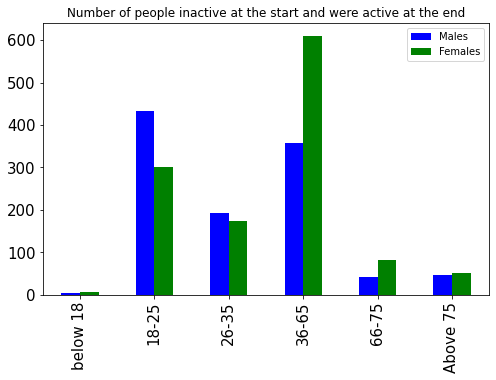

In [25]:
pattern_data.plot(kind="bar",figsize=(8,5),fontsize=15,title="Number of people inactive at the start and were active at the end",color=['b','g'])

##### From the above analysis we observed that the people who are inactive at the start and were active by the end are mostly middle aged 

##### females belonging to the age group of 36-65 followed by young males who belong to the age group of 18-25. from the barplot above, we 

##### can observe that there is a decrease in the count of females between age group of 18-25 and 26-35 and a sudden increase in age group 

##### 36-65 and the same pattern in reverse is observed in males.

## Do people with more than average annual income tend to have relatively high activity rates compared to people with less than average annual income?

###### for the below analysis we need to group the total people into two subgroups - people above average annual income and people below average annual income. so for this we considered median as central measure and grouped based on it

In [26]:
thresh = data["gross_income"].median()
columns = ["inactivity flag(begin)","inactivity flag(end)"]
higher_grosssal = data[data["gross_income"]>=thresh][columns]
lower_grosssal = data[data["gross_income"]<thresh][columns]

##### counting the people present in each group and creating a Dataframe based on the count

In [29]:
high = higher_grosssal.groupby(columns).value_counts()

In [30]:
low = lower_grosssal.groupby(columns).value_counts()

In [147]:
activity_data = pd.DataFrame(index=["Low Income","High Income"],columns=["Low Activity","High Activity"])
total_people = activity_data.sum()
activity_data["Low Activity"] = [low[0][0],low[1][1]]
activity_data["High Activity"] = [high[0][0],high[1][1]]
activity_data

,Low Activity,High Activity
Low Income,13668,11422
High Income,9562,11879


## Visualization of results

<AxesSubplot:title={'center':'relative activity rates of people'}>

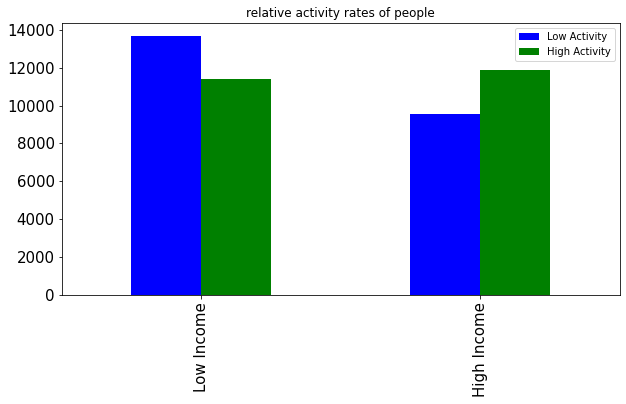

In [33]:
activity_data.plot(kind="bar",figsize=(10,5),fontsize=15,title="relative activity rates of people",color=['b','g'])

#### From the above analysis we can say that people with more than average annual income are more active comapred to the people with 

#### less than average annual income and people with less than average income are more inactive compared to people with more annual income

## Is there any relationship between the number of products owned by customers who were active at the start and at the end vs those who were active at the start but were inactive at the end of the study period?

##### Loading data based on the activity at the beginning and by the end

In [34]:
active_start_end = activity_loader(data,1,1)

active_start_notend = activity_loader(data,1,0)

##### count of products owned by people who were active in the start and active by the end

In [35]:
active_start_end.groupby("products")["products"].value_counts() 

products  products
0         0             63
1         1           7888
2         2           5639
3         3           2896
4         4           1758
5         5           1193
6         6            889
7         7            595
8         8            315
9         9            138
10        10            44
11        11            13
12        12             8
13        13             2
Name: products, dtype: int64

##### count of products owned by people who were active in the start and not active by the end

In [37]:
active_start_notend.groupby("products")["products"].value_counts() 

products  products
0         0            694
1         1           1027
2         2            220
3         3             14
4         4              5
Name: products, dtype: int64

## Visualization of results

Text(0.5, 0, 'products')

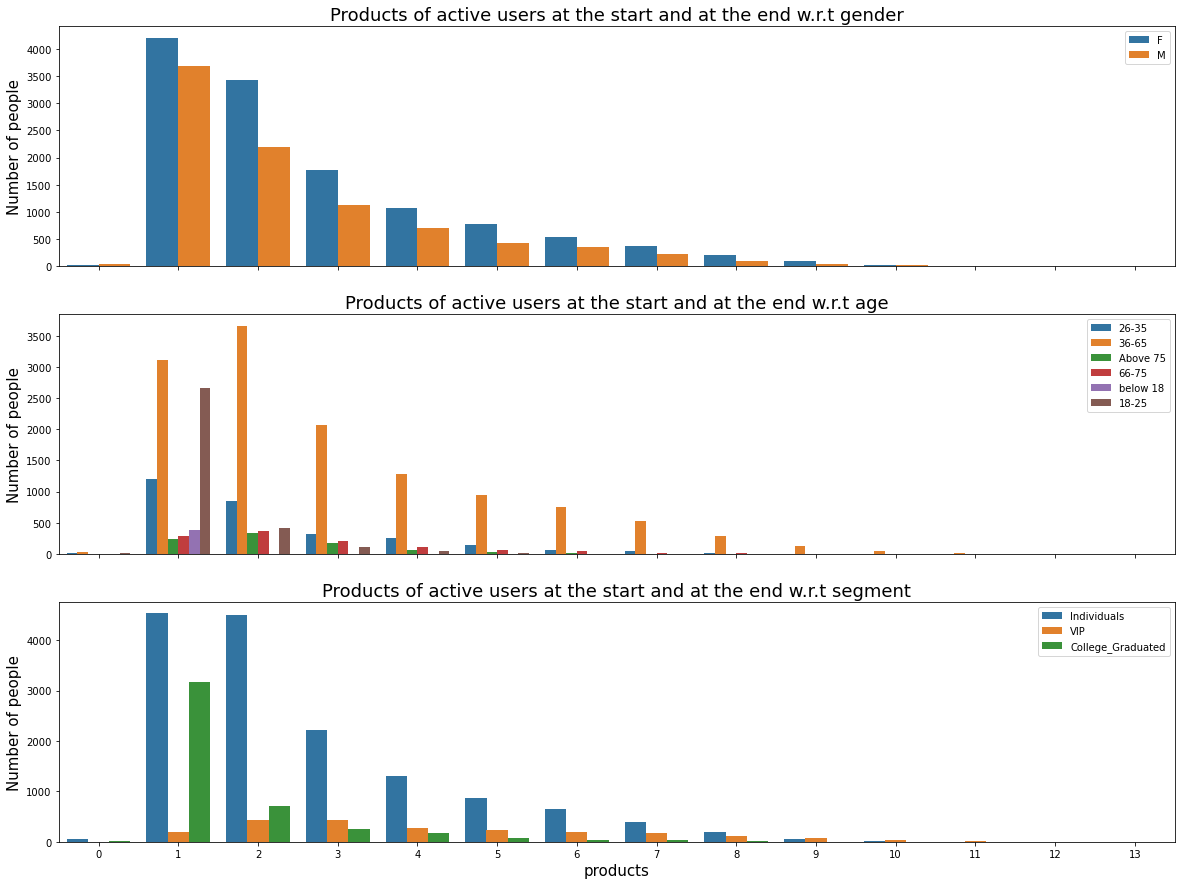

In [38]:
fig, axis = plt.subplots(3,1,sharex=True,figsize=(20,15))
order = ["gender","age","segment"]

for i in range(0,3):
    sns.countplot(x="products",data=active_start_end,hue=order[i],ax=axis[i])
    axis[i].set_xlabel(" ", size=15)
    axis[i].set_ylabel("Number of people", size=15)
    axis[i].set_title("Products of active users at the start and at the end w.r.t "+ order[i], size=18)
    axis[i].legend(loc="upper right")
axis[len(order)-1].set_xlabel("products",size=15)

#### Most People who are active at the start and at the end own 1-2 products and the potentials customers belong to individuals 

#### category of age group 36-65 and most of the customers are female

Text(0.5, 0, 'products')

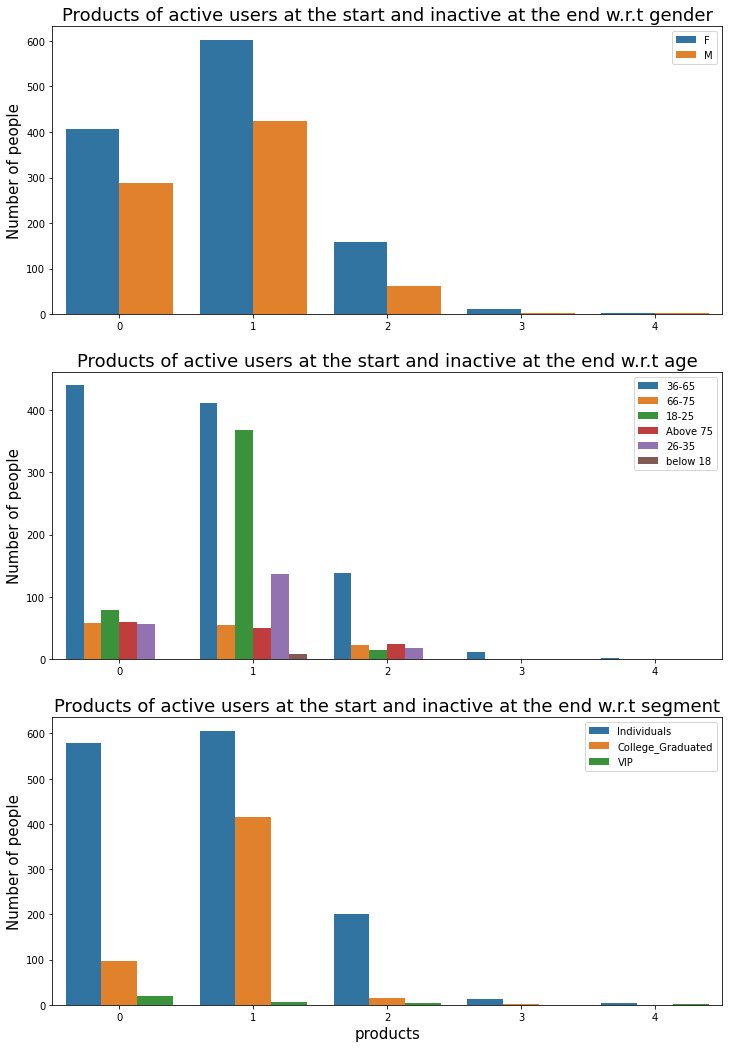

In [41]:
fig, axis = plt.subplots(3,1,figsize=(12,18))

#Products of active users at the start and not active at the end
order = ["gender","age","segment"]
for i in range(0,3):
    sns.countplot(x="products",data=active_start_notend,hue=order[i],ax=axis[i])
    axis[i].set_xlabel(" ", size=15)
    axis[i].set_ylabel("Number of people", size=15)
    axis[i].set_title("Products of active users at the start and inactive at the end w.r.t "+ order[i], size=18)
    axis[i].legend(loc="upper right")
axis[len(order)-1].set_xlabel("products",size=15)

#### There were only a maximum of 4 products that were owned by people who were active at start and inactive by the end and 

#### majority were females belonging to age group of 35-65 in individuals segment

#### From the above analysis we observe that people who are more active, owned more products, compared to the people who 

#### are less active. Particulary female Individuals belonging to the age group 36-65 is more active and owned more products 

## How people who display consistent behaviour (active at start and active at end, inactive at start and inactive at end) differ from people who display a change in their behaviour (active at start but inactive at the end or inactive at start but active at end)?

##### Function to load behaviour and return a DataFrame of it

In [62]:
def consistent_activity_loader():
    return (data[((data["inactivity flag(begin)"] == 1) &  (data["inactivity flag(end)"] == 1)) | 
                 ((data["inactivity flag(begin)"] == 0) &  (data["inactivity flag(end)"] == 0))])


def inconsistent_activity_loader():
    return (data[((data["inactivity flag(begin)"] == 1) &  (data["inactivity flag(end)"] == 0)) |
               ((data["inactivity flag(begin)"] == 0) &  (data["inactivity flag(end)"] == 1))])

In [63]:
consistent_people = consistent_activity_loader()
inconsistent_people = inconsistent_activity_loader()

In [64]:
consistent_data_gender = consistent_people.groupby(["gender"])["gender"].value_counts()
consistent_data_gender

gender  gender
F       F         25517
M       M         21014
Name: gender, dtype: int64

In [65]:
inconsistent_data_gender = inconsistent_people.groupby(["gender"])["gender"].value_counts()
inconsistent_data_gender

gender  gender
F       F         2405
M       M         1858
Name: gender, dtype: int64

In [66]:
#Creating a DataFrame that contains the count of different age groups of people in the data
con_pattern_data = pd.DataFrame(columns=["Males","Females"],
                            index=["Consistent","Inconsistent"])

#Extracting count of age groups from data
con_pattern_data["Males"] = [consistent_data_gender.loc["M"][0],inconsistent_data_gender.loc["M"][0]]
con_pattern_data["Females"] = [consistent_data_gender.loc["F"][0],inconsistent_data_gender.loc["F"][0]]
con_pattern_data

,Males,Females
Consistent,21014,25517
Inconsistent,1858,2405


<AxesSubplot:title={'center':'Consistent vs Inconsistent people by Gender'}>

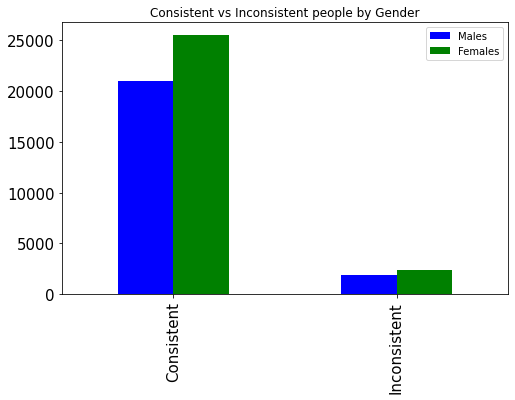

In [67]:
con_pattern_data.plot(kind="bar",figsize=(8,5),fontsize=15,title="Consistent vs Inconsistent people by Gender",color=['b','g'])

# Visualization of Results

## Comparision of Consistent and Inconsistent people

Text(0.5, 0, 'Activity')

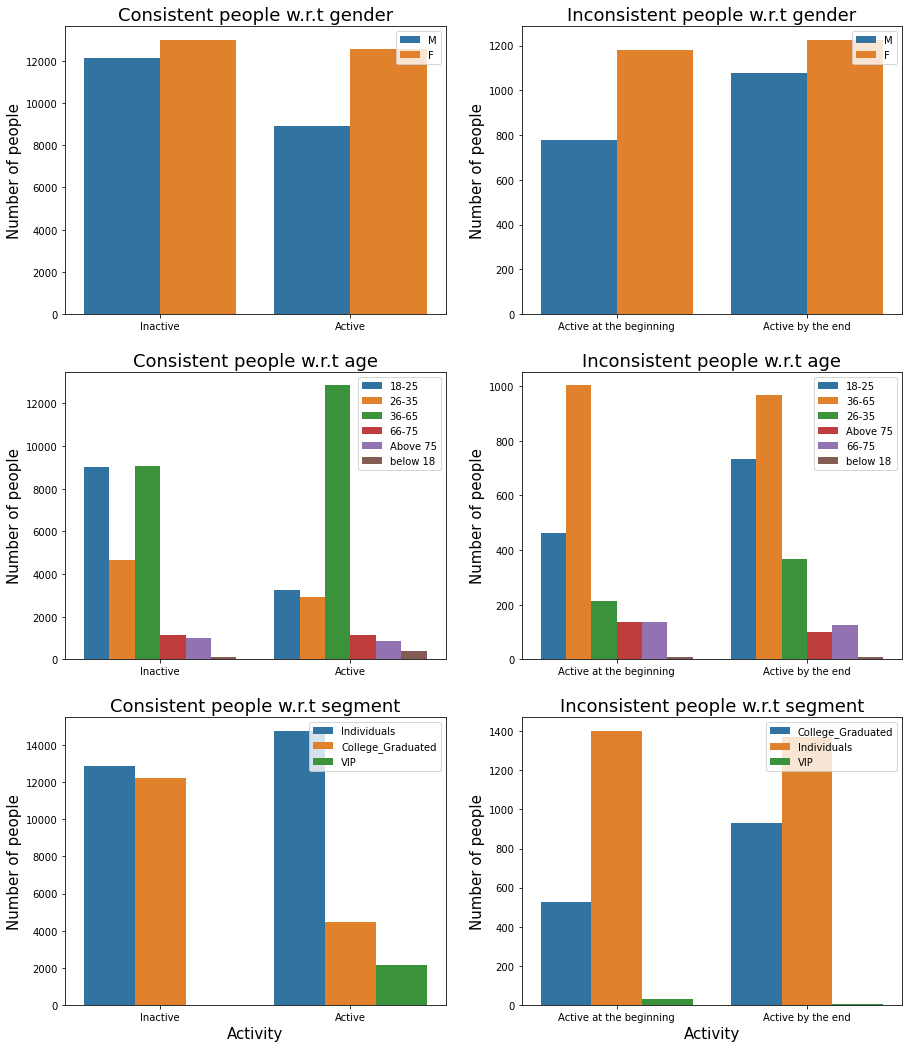

In [69]:
fig, axis = plt.subplots(3,2,figsize=(15,18))

#Consistent people
order = ["gender","age","segment"]
for i in range(0,3):
    a = sns.countplot(x="inactivity flag(begin)",data=consistent_people,hue=order[i],ax=axis[i,0])
    axis[i,0].set_xlabel(" ", size=15)
    axis[i,0].set_ylabel("Number of people", size=15)
    axis[i,0].set_title("Consistent people w.r.t "+ order[i], size=18)
    axis[i,0].legend(loc="upper right")
    a.set_xticklabels(["Inactive","Active"])
axis[len(order)-1,0].set_xlabel("Activity",size=15)

#Inconsistent people
for i in range(0,3):
    a=sns.countplot(x="inactivity flag(end)",data=inconsistent_people,hue=order[i],ax=axis[i,1])
    axis[i,1].set_xlabel(" ", size=15)
    axis[i,1].set_ylabel("Number of people", size=15)
    axis[i,1].set_title("Inconsistent people w.r.t "+ order[i], size=18)
    axis[i,1].legend(loc="upper right")
    a.set_xticklabels(["Active at the beginning","Active by the end"])
axis[len(order)-1,1].set_xlabel("Activity",size=15)

#### From the above analysis, we observe that people who showed consistent behaviour are females and people belonging to   
#### the age group 35- 65. Among the three segments of the present data, Individuals showed more consistent activity
#### compared to the other two segments of people. The catch is that the same category of females in Individuals segment 
#### topped the Inconsistent behaviour results.

## Elaborate profiles of 
### a. Active at the start but inactive at the end


In [48]:
data_new = data.copy()
data_new["age"] = age_data

In [49]:
active_start_data = activity_loader(data,1,0)

In [56]:
active_start_data.describe(include="all")

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
count,1960,1960,1960.000000,1960,1960.000000,1960.0,1960.0,1960.000000,1960.000000,1960.000000
unique,2,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,F,36-65,NaN,Individuals,NaN,NaN,NaN,NaN,NaN,NaN
freq,1180,1003,NaN,1403,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,110871.126077,NaN,0.007143,1.0,0.0,0.780102,0.012245,3335.762755
std,NaN,NaN,58218.248745,NaN,0.084235,0.0,0.0,0.685377,0.110005,2316.324977
min,NaN,NaN,14135.610000,NaN,0.000000,1.0,0.0,0.000000,0.000000,366.000000
25%,NaN,NaN,66323.527500,NaN,0.000000,1.0,0.0,0.000000,0.000000,932.750000
50%,NaN,NaN,98185.245000,NaN,0.000000,1.0,0.0,1.000000,0.000000,3549.500000
75%,NaN,NaN,141505.687500,NaN,0.000000,1.0,0.0,1.000000,0.000000,5423.000000


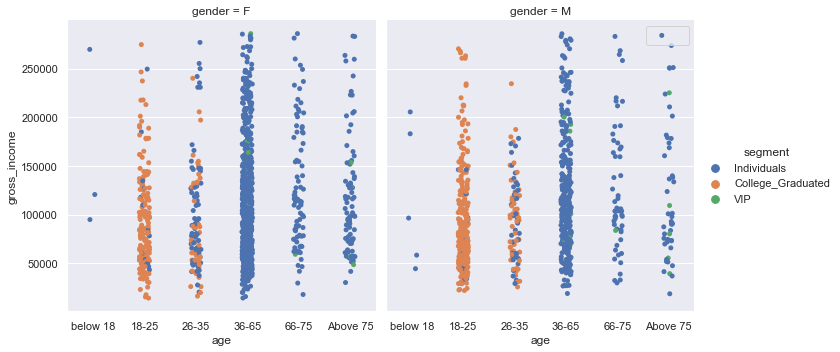

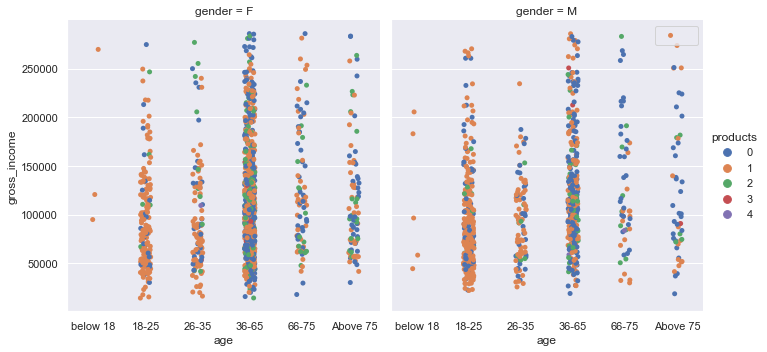

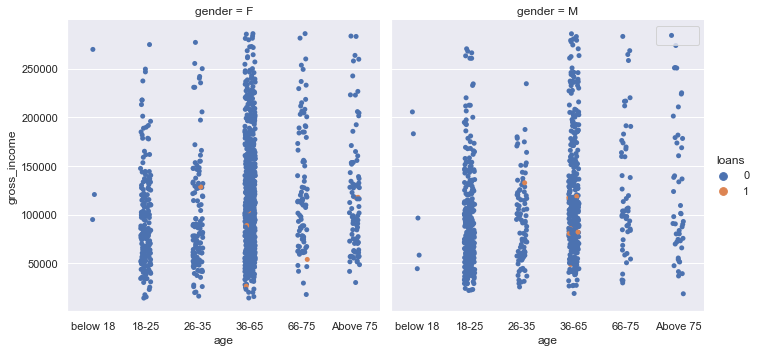

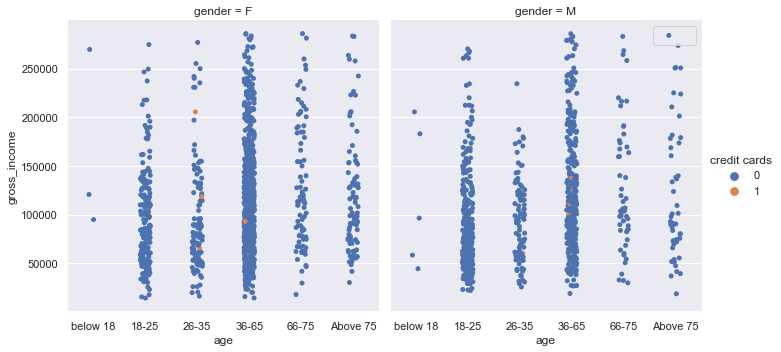

In [144]:
flow = ["segment","products","loans","credit cards"]
for i in range(0,len(flow)):
    a = sns.catplot(x="age",y="gross_income",data=active_start_data,hue=flow[i],col="gender",order=["below 18","18-25","26-35","36-65","66-75","Above 75"])
    plt.legend(" ")

##### From the above analysis, we observe that People belonging to the group Active at the start but inactive at the end are 60% female. 72%  

##### belong to Individuals segment and 51% belong to the age group of 35-65. Moreover gross income of people from this group is ranging 

##### from 14000 dollars to 285000 dollars. Also, This group of people showed very low interest in taking loans and applying for credit cards. 

##### But, This group of people owned a maximum of four products.

### b. Active at the start and active by the end

In [120]:
active_data = activity_loader(data,1,1)

In [121]:
active_data.describe(include="all")

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
count,21441,21441,21441.000000,21441,21441.000000,21441.0,21441.0,21441.000000,21441.000000,21441.000000
unique,2,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,F,36-65,NaN,Individuals,NaN,NaN,NaN,NaN,NaN,NaN
freq,12540,12848,NaN,14784,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,117200.279482,NaN,0.114780,1.0,1.0,2.556644,0.020755,3247.795625
std,NaN,NaN,58328.444357,NaN,0.318764,0.0,0.0,1.861249,0.142565,2113.422496
min,NaN,NaN,5340.930000,NaN,0.000000,1.0,1.0,0.000000,0.000000,366.000000
25%,NaN,NaN,72209.580000,NaN,0.000000,1.0,1.0,1.000000,0.000000,1157.000000
50%,NaN,NaN,105175.110000,NaN,0.000000,1.0,1.0,2.000000,0.000000,3075.000000
75%,NaN,NaN,152773.350000,NaN,0.000000,1.0,1.0,3.000000,0.000000,5205.000000


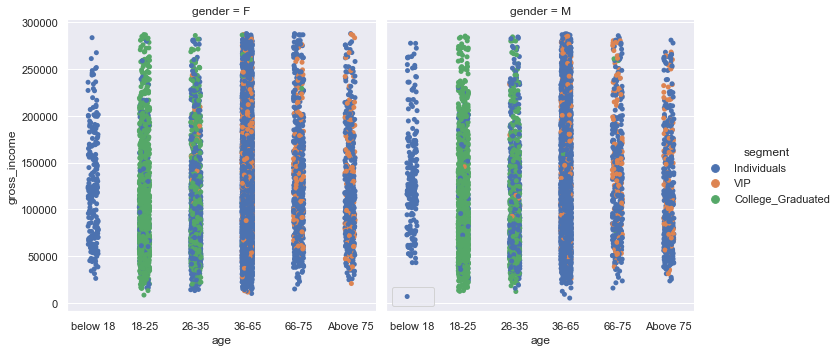

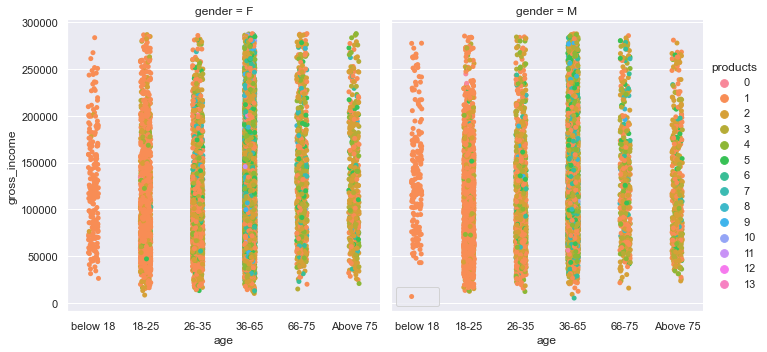

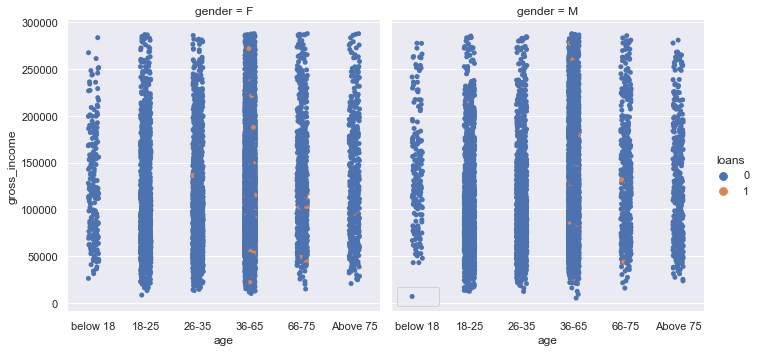

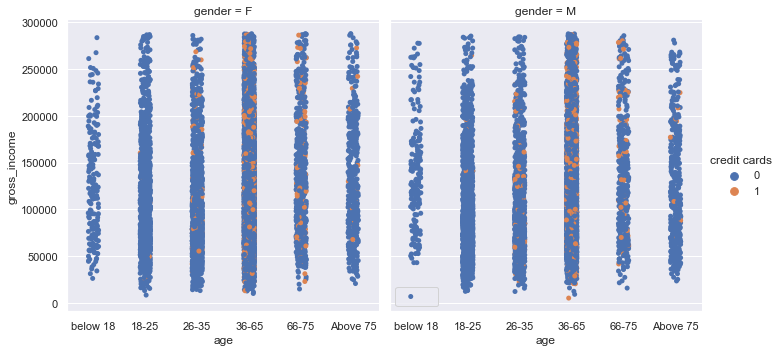

In [143]:
for i in range(0,len(flow)):
    a = sns.catplot(x="age",y="gross_income",data=active_data,hue=flow[i],col="gender",order=["below 18","18-25","26-35","36-65","66-75","Above 75"])
    plt.legend(" ")

##### From the above analysis, we observe that People belonging to the group Active at the start but inactive at the end are 58% female. 69%  

##### belong to Individuals segment and 60% belong to the age group of 35-65. Moreover gross income of people from this group is ranging 

##### from 5000 dollars to 288000 dollars. Also, This group of people showed very low interest in taking loans and applying for credit cards. 

##### But, This group of people owned an average of 2 products.

### c. Inactive at the start but active at the end

In [127]:
inactive_start_data = activity_loader(data,0,1)

In [128]:
inactive_start_data.describe(include="all")

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
count,2303,2303,2303.000000,2303,2303.000000,2303.0,2303.0,2303.000000,2303.0,2303.000000
unique,2,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,F,36-65,NaN,Individuals,NaN,NaN,NaN,NaN,NaN,NaN
freq,1225,968,NaN,1372,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,106685.966170,NaN,0.001737,0.0,1.0,1.268780,0.0,2609.442032
std,NaN,NaN,56101.532422,NaN,0.041649,0.0,0.0,0.525056,0.0,1859.659249
min,NaN,NaN,9049.620000,NaN,0.000000,0.0,1.0,0.000000,0.0,366.000000
25%,NaN,NaN,65494.815000,NaN,0.000000,0.0,1.0,1.000000,0.0,1083.000000
50%,NaN,NaN,93534.720000,NaN,0.000000,0.0,1.0,1.000000,0.0,1814.000000
75%,NaN,NaN,135612.495000,NaN,0.000000,0.0,1.0,1.000000,0.0,4243.000000


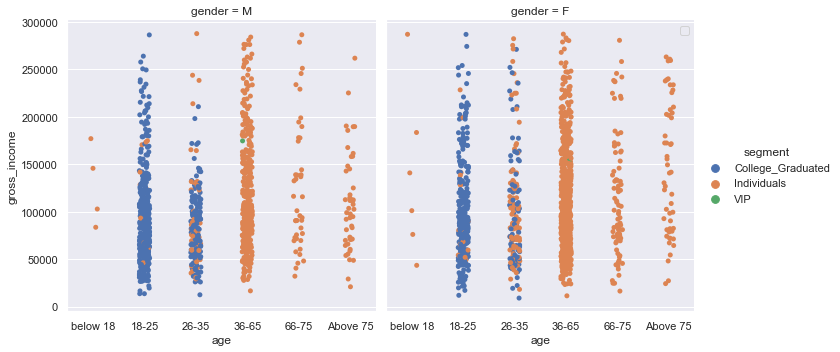

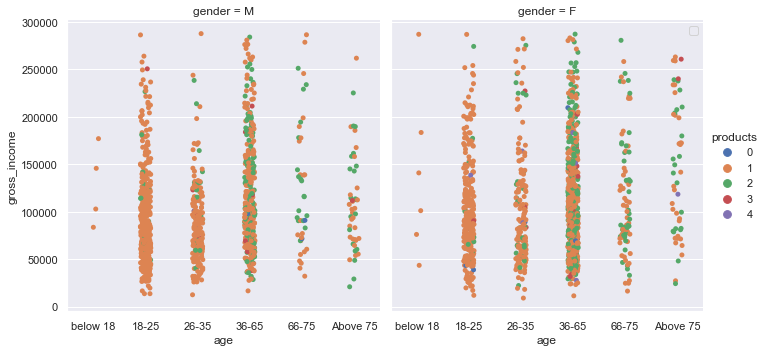

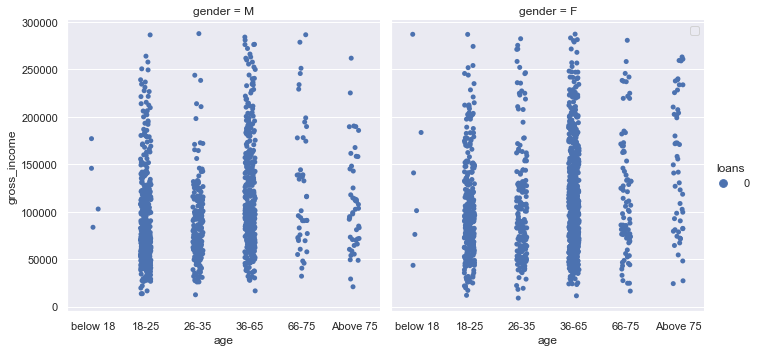

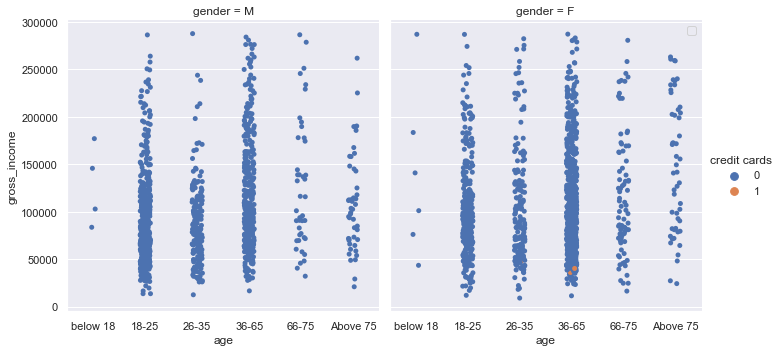

In [142]:
for i in range(0,len(flow)):
    a = sns.catplot(x="age",y="gross_income",data=inactive_start_data,hue=flow[i],col="gender",order=["below 18","18-25","26-35","36-65","66-75","Above 75"])
    plt.legend("")

##### From the above analysis, we observe that People belonging to the group Inactive at the start but active at the end are 53% female. 60%  

##### belong to Individuals segment and 43% belong to the age group of 35-65. Moreover gross income of people from this group is ranging 

##### from 9000 dollars to 288000 dollars. Also, This group of people showed very low interest in taking loans and no interest in applying for 

##### credit cards. But, This group of people owned an average of 1 product.

 ### d. Inactive at the start and inactive at the end

In [130]:
inactive_data = activity_loader(data,0,0)

In [131]:
inactive_data.describe(include="all")

,gender,age,gross_income,segment,credit cards,inactivity flag(begin),inactivity flag(end),products,loans,duration
count,25090,25090,25090.000000,25090,25090.000000,25090.0,25090.0,25090.000000,25090.0,25090.000000
unique,2,6,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,F,36-65,NaN,Individuals,NaN,NaN,NaN,NaN,NaN,NaN
freq,12977,9076,NaN,12878,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,104914.651416,NaN,0.000080,0.0,0.0,0.722519,0.0,2526.081267
std,NaN,NaN,56200.096831,NaN,0.008928,0.0,0.0,0.547412,0.0,1835.224056
min,NaN,NaN,2336.010000,NaN,0.000000,0.0,0.0,0.000000,0.0,366.000000
25%,NaN,NaN,62979.262500,NaN,0.000000,0.0,0.0,0.000000,0.0,1082.000000
50%,NaN,NaN,90847.365000,NaN,0.000000,0.0,0.0,1.000000,0.0,1767.000000
75%,NaN,NaN,134443.207500,NaN,0.000000,0.0,0.0,1.000000,0.0,3828.000000


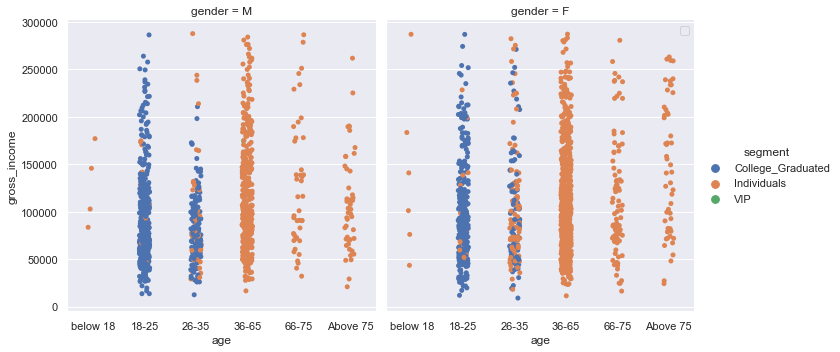

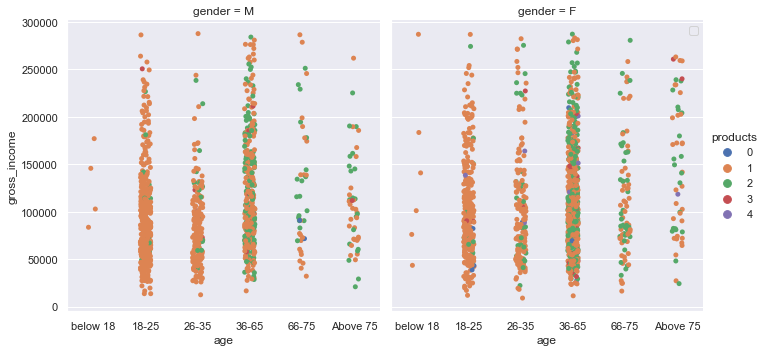

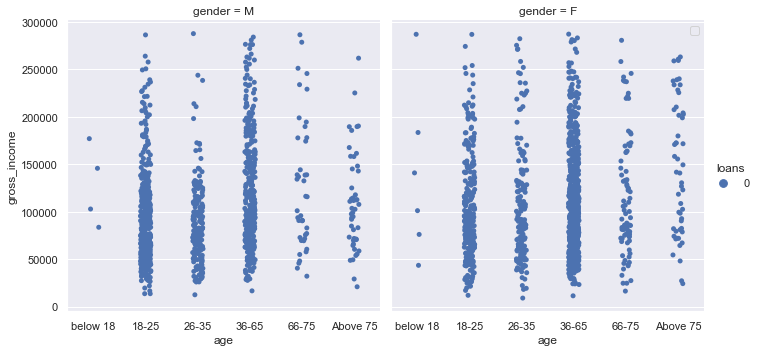

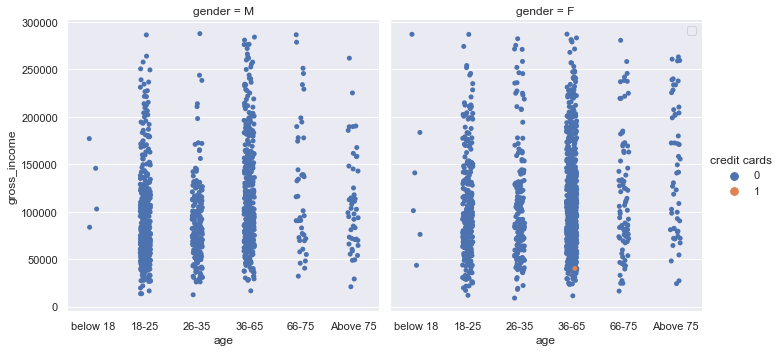

In [141]:
for i in range(0,len(flow)):
    a = sns.catplot(x="age",y="gross_income",data=inactive_start_data,hue=flow[i],col="gender",order=["below 18","18-25","26-35","36-65","66-75","Above 75"])
    plt.legend("")

##### From the above analysis, we observe that People belonging to the group Inactive at the start and inactive at the end are 52% female.  

##### 51% belong to Individuals segment and 36% belong to the age group of 35-65. Moreover gross income of people from this group is 

##### ranging from 2300 dollars to 288000 dollars. Also, This group of people showed no interest in taking loans and applying for credit cards.

##### But, This group of people owned an average of 0 products.